# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#  Load data 
cast = pd.read_csv("cast.csv")
release = pd.read_csv("release_dates.csv")
titles = pd.read_csv("titles.csv")

print(cast.head())
print(release.head())
print(titles.info())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN
                    title  year      country        date
0   #73, Shaanthi Nivaasa  2007        India  2007-06-15
1                   #BKKY  2016     Cambodia  2017-10-12
2                 #Beings  2015      Romania  2015-01-29
3               #Captured  2017          USA  2017-09-05
4  #Ewankosau saranghaeyo  2015  Philippines  2015-01-21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   t

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [5]:
# Check how many records (rows) and columns each file has
print("\n--- DATA SHAPE ---")
print(f"cast: {cast.shape[0]} rows, {cast.shape[1]} columns")
print(f"release: {release.shape[0]} rows, {release.shape[1]} columns")
print(f"titles: {titles.shape[0]} rows, {titles.shape[1]} columns")


--- DATA SHAPE ---
cast: 3442902 rows, 6 columns
release: 443486 rows, 4 columns
titles: 226013 rows, 2 columns


In [7]:
# Inspect data types and missing values
print("\n--- CAST DATA INFO ---")
print(cast.info())

print("\n--- RELEASE DATES DATA INFO ---")
print(release.info())

print("\n--- TITLES DATA INFO ---")
print(titles.info())

# Basic overview of numeric and categorical columns
print("\n--- CAST DATA SUMMARY ---")
print(cast.describe(include='all'))

print("\n--- RELEASE DATES DATA SUMMARY ---")
print(release.describe(include='all'))

print("\n--- TITLES DATA SUMMARY ---")
print(titles.describe(include='all'))


--- CAST DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None

--- RELEASE DATES DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None

--- TITLES DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---

Overview of Datasets:


1. Cast Dataset

Contains detailed information about movie casts and crew.

Columns: title, year, name, type (actor/actress), character, n (billing/order of importance).

Data Types: Mostly object (categorical) + numeric (year, n).

Missing Data: character and n columns have some missing/NaN entries.

Interesting Insights: Covers over 168,000 unique movie/TV titles. Over 1.26 million unique cast/crew names. type column has only 2 unique types → primarily “actor” and “actress”. 
Earliest year: 1894, Latest year: 2115 (future/planned titles).



2. Release Dates Dataset:

Contains the release dates of films in different countries.

Columns: title, year, country, date.

Data Types: All object except year.

Data Quality: Very minimal missing values (only 1 title missing). date column is stored as string, should likely be converted to datetime.

Scope: Covers release info for 125,000+ unique movies across 200 countries. Most frequent country: USA. Release dates range from 1894 to 2115.



3. Titles Dataset:

Holds the master list of unique movie titles and production years.

Columns: title, year.

Rows: 226,013 → more than release but far fewer than cast entries.

Missing Values: Only 1 missing title.

Top repeated movie name: Hamlet — appears 20 times.

Year Range: 1894–2115.

4. Key Observations

Massive dataset size - over 3.4 million cast records makes memory handling and joins potentially heavy.
Some future years (2115) - might indicate data errors or unreleased/future projects.
Missing data is minimal except in cast’s character and n fields.
Titles act as a central key between all datasets (title, year).

### 2. How many movies have the title North by Northwest

In [12]:
count = titles[titles["title"] == "North by Northwest"].shape[0]
print(f"There is {count} movie titled 'North by Northwest'.")


There is 1 movie titled 'North by Northwest'.


### 3. How many version of Hamlet are there, when was the first made? the last?

In [14]:

hamlet = titles[titles["title"] == "Hamlet"]

# Count total versions
count = hamlet.shape[0]

# Exclude future years
hamlet = hamlet[hamlet["year"] <= pd.Timestamp.now().year]

# Find first and last years
first_year = hamlet["year"].min()
last_year = hamlet["year"].max()

print(f"There are {count} versions of Hamlet.")
print(f"The first was made in {first_year} and the most recent in {last_year}.")


There are 20 versions of Hamlet.
The first was made in 1910 and the most recent in 2017.


### 4. List all the movies called Treasure Island from oldest to newest

In [16]:

treasure_island = titles[titles["title"] == "Treasure Island"]

# Exclude future years and sort
treasure_island = treasure_island[treasure_island["year"] <= pd.Timestamp.now().year]
treasure_island = treasure_island.sort_values("year")

# Display results
treasure_island[["title", "year"]]


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [18]:

years = [1950, 1980, 2000]
for y in years:
    count = titles[titles["year"] == y].shape[0]
    print(f"Movies made in {y}: {count}")


Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


The number of movies increased significantly from 1,109 in 1950 to 1,750 in 1980, and then to 2,568 in 2000. This shows a clear upward trend in film production over the decades.

Growth reflects advancements in filmmaking technology, the rise of color films, special effects, and global accessibility of production tools. By 1980 and especially 2000, the film industry had become more commercially globalized, with more studios, independent producers, and international markets fueling production. The increase in films also mirrors a broadening of cultural output, as more regions and languages began producing movies for both local and global audiences.

### 6. How big was the cast of Metropolis


In [20]:

metropolis_cast = cast[cast["title"] == "Metropolis"]
cast_size = metropolis_cast.shape[0]
print(f"Cast size of Metropolis: {cast_size}")


Cast size of Metropolis: 33


### 7. How many roles for actors were there 1950's? 1990's

In [22]:

actors_1950s = cast[(cast["year"] >= 1950) & (cast["year"] < 1960) & (cast["type"] == "actor")]
actors_1990s = cast[(cast["year"] >= 1990) & (cast["year"] < 2000) & (cast["type"] == "actor")]

print("Roles for actors in 1950s:", actors_1950s.shape[0])
print("Roles for actors in 1990s:", actors_1990s.shape[0])


Roles for actors in 1950s: 153559
Roles for actors in 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

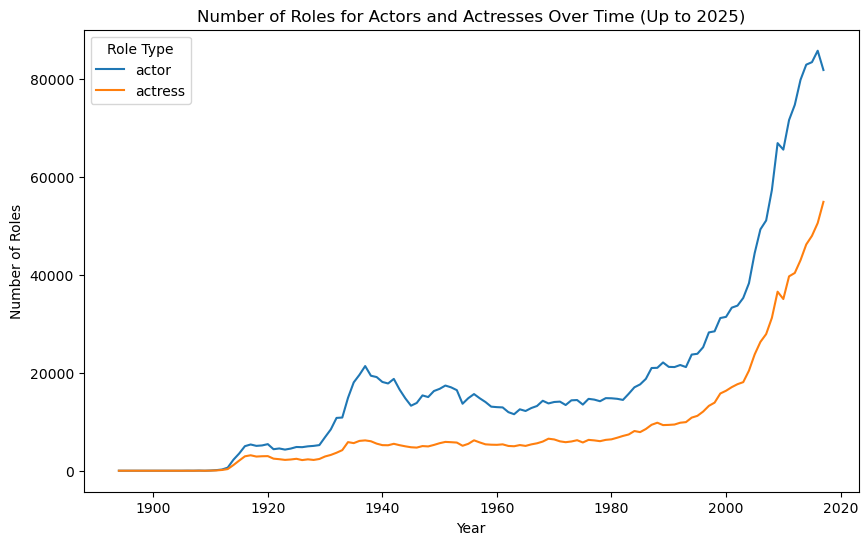

In [24]:
roles_by_year = cast.groupby(["year", "type"]).size().unstack(fill_value=0)

# Filter to include only years up to 2017
roles_by_year = roles_by_year[roles_by_year.index <= 2017]

# Plot
roles_by_year.plot(kind="line", figsize=(10,6))
plt.title("Number of Roles for Actors and Actresses Over Time (Up to 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.legend(title="Role Type")
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [26]:
leading_roles_2000s = cast[
    (cast["year"] >= 2000) & 
    (cast["year"] < 2010) & 
    (cast["n"] == 1)
]

print("Leading roles in the 2000s:", leading_roles_2000s.shape[0])

Leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [28]:
no_rank_2000s = cast[(cast["year"] >= 2000) & (cast["year"] < 2010) & (cast["n"].isna())]
no_rank_1950s = cast[(cast["year"] >= 1950) & (cast["year"] < 1960) & (cast["n"].isna())]

print("Roles with no ranking in the 2000s:", no_rank_2000s.shape[0])
print("Roles with no ranking in the 1950s:", no_rank_1950s.shape[0])

Roles with no ranking in the 2000s: 232037
Roles with no ranking in the 1950s: 95406


There were 232,037 unranked roles in the 2000s compared to 95,406 in the 1950s.

Despite data collection being more complete in recent decades, the total number of movies and credited roles also grew dramatically — leading to more unranked entries overall. This suggests that while IMDb’s coverage expanded, not every role (especially minor or background ones) was assigned a rank.

The higher number in the 2000s reflects both the explosion of film production worldwide and greater inclusion of all credited roles, not necessarily poorer data quality. In contrast, the 1950s’ smaller count reflects a smaller film industry output and less comprehensive record-keeping at the time.

### 11. Plot the number of films made in each decade

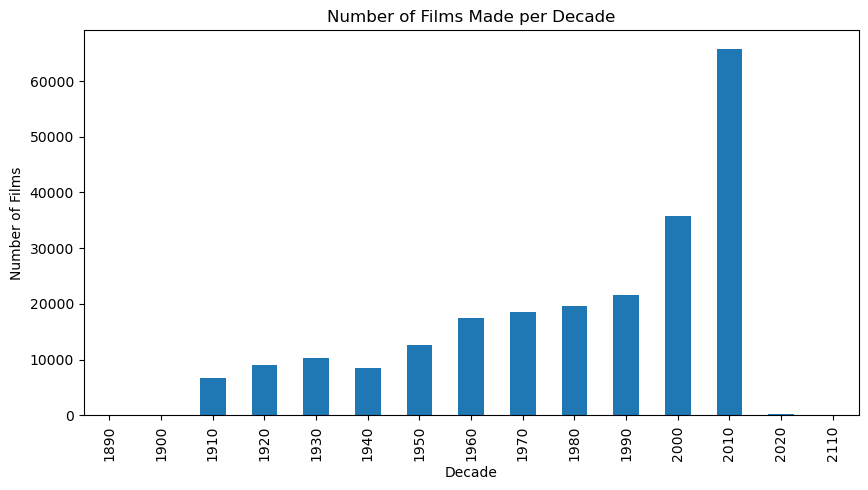

In [30]:
# Create a new column for decade
titles["decade"] = (titles["year"] // 10) * 10

# Count how many films per decade
films_per_decade = titles.groupby("decade")["title"].count()

# Plot the results
films_per_decade.plot(kind="bar", figsize=(10, 5), title="Number of Films Made per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Films")
plt.show()

### 12. Plot the number of films with a Rustler character over time

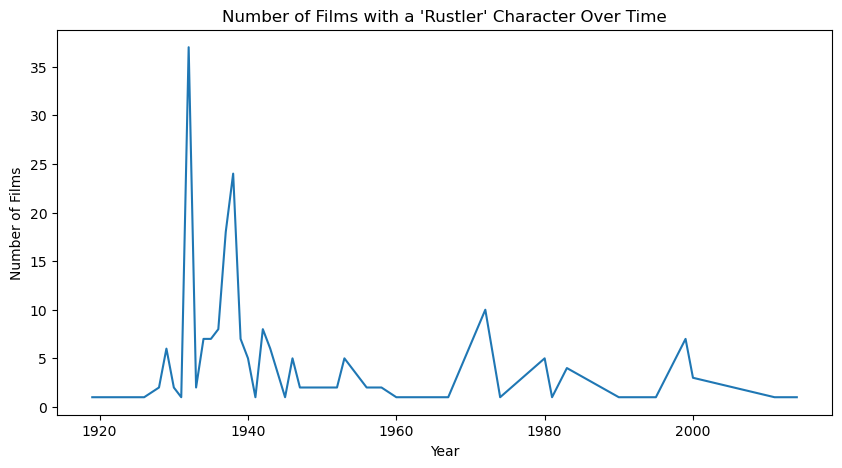

In [32]:
# Filter for rows where the character name contains "Rustler"
rustler_roles = cast[cast["character"].str.contains("Rustler", case=False, na=False)]

# Group by year and count the number of appearances
rustler_per_year = rustler_roles.groupby("year")["title"].count()

# Plot the trend
rustler_per_year.plot(kind="line", figsize=(10, 5), title="Number of Films with a 'Rustler' Character Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.show()

### 13. What are the top ten character names of all time?

In [34]:
top_characters = (
    cast["character"]
    .value_counts()
    .head(10)
)

print(top_characters)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [36]:
# Filter for roles from 1990 to 1999
cast_1990s = cast[(cast["year"] >= 1990) & (cast["year"] < 2000)]

# Count how many films each actor appeared in
most_films_1990s = (
    cast_1990s["name"]
    .value_counts()
    .head(1)
)

print(most_films_1990s)

name
Shakti Kapoor    143
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [38]:
science_roles = (
    cast[cast["character"].str.startswith("Science", na=False)]
    ["character"]
    .value_counts()
    .head(10)
)

print(science_roles)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [40]:
largest_cast = (
    cast.groupby(["title"])["name"]
    .nunique()                     # count unique actor names per film
    .sort_values(ascending=False)  # sort in descending order
    .head(1)                       # get the top film
)

print(largest_cast)

title
Around the World in 80 Days    1363
Name: name, dtype: int64


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [42]:
# Count unique cast members per movie
cast_size = (
    cast.groupby("title")["name"]
    .nunique()
    .reset_index(name="cast_size")
)

# Display descriptive statistics
cast_size_stats = cast_size["cast_size"].describe()
print(cast_size_stats)

count    168254.000000
mean         20.115855
std          23.607947
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1363.000000
Name: cast_size, dtype: float64


Count (168,254 films) -- A large and diverse dataset, plenty of observations, giving a strong overview of film industry patterns across decades.

Mean (≈ 20.1 cast members) -- On average, each film credits around 20 actors, suggesting that most movies feature moderate-sized casts.

Standard Deviation (≈ 23.6) -- The large spread indicates high variability, some films have small, intimate casts while others include hundreds (or even thousands) of credited names.

Median (13) -- Half of all films have 13 or fewer actors, which confirms that smaller productions are far more common than massive ones.

75th Percentile (26) -- Only 25% of films have more than 26 credited actors, so large ensemble casts are relatively rare.

Maximum (1363) -- This extreme value points to a massive production, likely a historical epic or large-scale film (with crowd scenes or many extras) like we saw in around the world in 80 days

### 18. How many films has Natalie Portman been in in each year throughout her career?

    year  film_count
0   1995           1
1   1996           3
2   1999           2
3   2000           1
4   2001           1
5   2002           1
6   2003           1
7   2004           2
8   2005           4
9   2006           1
10  2007           3
11  2008           1
12  2009           2
13  2010           3
14  2011           3
15  2013           1
16  2015           4
17  2016           3
18  2017           1


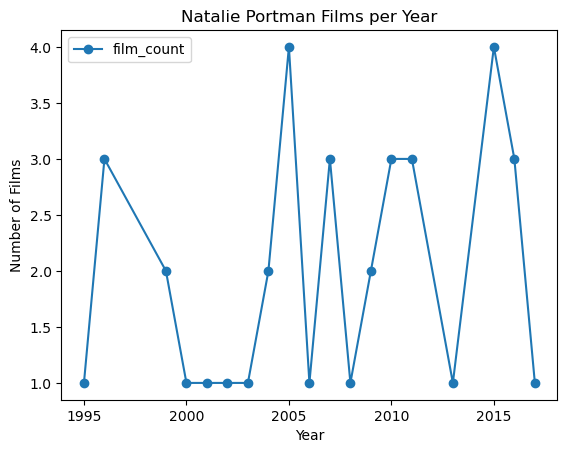

In [44]:
portman = cast[(cast["name"] == "Natalie Portman") & (cast["year"] <= 2025)]

portman_by_year = (
    portman.groupby("year")["title"]
    .nunique()
    .reset_index(name="film_count")
)

print(portman_by_year)

# plot
portman_by_year.plot(x="year", y="film_count", kind="line", marker="o",
                     title="Natalie Portman Films per Year")
plt.xlabel("Year"); plt.ylabel("Number of Films"); plt.show()


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

    year  film_count
0   1999           1
1   2000           1
2   2002           1
3   2005           3
4   2006           1
5   2007           1
6   2008           1
7   2009           1
8   2010           1
9   2011           2
10  2013           1
11  2015           2
12  2016           2


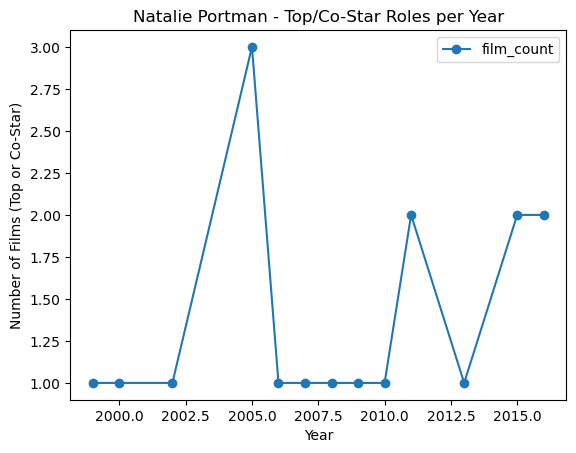

In [46]:
# Filter Natalie Portman’s roles where she was top star (rank 1) or co-star (rank 2)
portman_top_roles = cast[
    (cast["name"] == "Natalie Portman") &
    (cast["n"].isin([1, 2])) &   # n = role rank in the cast
    (cast["year"] <= 2025)       # exclude future years
]

# Count number of films per year
portman_top_roles_by_year = (
    portman_top_roles.groupby("year")["title"]
    .nunique()
    .reset_index(name="film_count")
)

# Display result
print(portman_top_roles_by_year)

# Plot trend over time
portman_top_roles_by_year.plot(
    x="year",
    y="film_count",
    kind="line",
    marker="o",
    title="Natalie Portman - Top/Co-Star Roles per Year"
)
plt.xlabel("Year")
plt.ylabel("Number of Films (Top or Co-Star)")
plt.show()


### 20. Determine how many roles for actor or actress by decade. Plot the output 

    decade  total_roles
0     1890            3
1     1900           70
2     1910        43129
3     1920        71938
4     1930       198570
5     1940       210670
6     1950       209890
7     1960       182616
8     1970       202992
9     1980       257683
10    1990       361218
11    2000       676027
12    2010      1027830
13    2020          257


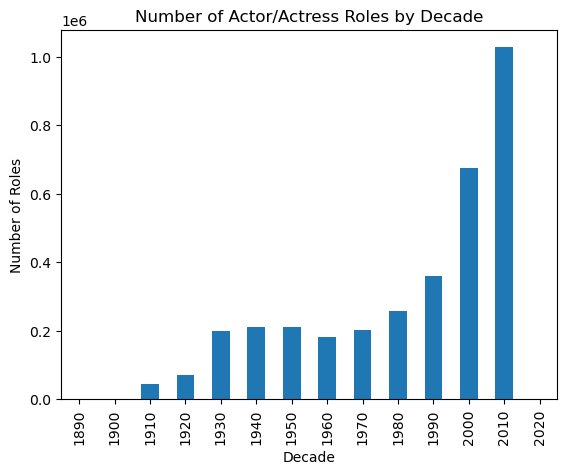

In [48]:
# Filter to include only roles identified as "actor" or "actress"
actors = cast[cast["type"].isin(["actor", "actress"])]

# Exclude future years 
actors = actors[actors["year"] <= 2025]

# Compute the decade for each role
actors["decade"] = (actors["year"] // 10) * 10

# Group by decade and count total roles
roles_by_decade = (
    actors.groupby("decade")["title"]
    .count()
    .reset_index(name="total_roles")
)

# Display the summary
print(roles_by_decade)

# Plot the result
roles_by_decade.plot(
    x="decade",
    y="total_roles",
    kind="bar",
    title="Number of Actor/Actress Roles by Decade",
    legend=False
)
plt.xlabel("Decade")
plt.ylabel("Number of Roles")
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [50]:
# Convert to datetime and extract useful features
release["date"] = pd.to_datetime(release["date"], errors="coerce")

# Remove invalid or future dates
release = release[release["date"].dt.year <= 2025]

# Extract day of week and month
release["day_of_week"] = release["date"].dt.day_name()
release["month"] = release["date"].dt.month_name()

# Create pivot table: number of releases by day of week and month
release_pivot = pd.pivot_table(
    release,
    index="day_of_week",
    columns="month",
    values="title",
    aggfunc="count",
    fill_value=0
)

# Display pivot table
display(release_pivot)

month,April,August,December,February,January,July,June,March,May,November,October,September
day_of_week,,,,,,,,,,,,
Friday,13559,13430,13020,13833,13734,11635,11997,15268,13198,14084,14893,14523
Monday,3168,2844,3240,3138,3699,2267,2337,3383,3050,3371,3551,3161
Saturday,2868,2277,3357,2395,2925,2291,2409,2742,2270,2546,2700,2551
Sunday,1358,1138,1813,1277,1822,894,1031,1228,1165,1342,1423,1332
Thursday,10625,9931,10666,10356,10746,8947,9469,11844,10100,10859,11490,10713
Tuesday,1446,1121,1903,1190,1823,1144,1179,1313,1377,1415,1542,1309
Wednesday,4650,4270,5097,4118,4663,4243,4282,4479,4289,4582,4605,4161


Day of the Week Observations

Friday is by far the most common release day, over 13,000–15,000 films per month.
Thursday follows closely, often used for early premieres and global releases.
Wednesday sees occasional releases, mainly during holidays or special events.
Monday and Tuesday have the fewest releases, as audiences are least active early in the week.
Saturday and Sunday also show low release counts since most films debut earlier and continue showing through the weekend.

Monthly Observations

High release activity: March–May and June–August (summer blockbuster season).
Another peak: November–December (holiday season and award contenders).
Low release activity: January–February (post-holiday slump) and September–October (transition months).
Seasonal trends align with audience availability, school vacations and holidays attract larger audiences.

Key Insights

Studios strategically release movies on Fridays to maximize opening weekend box office earnings.
Seasonal peaks correspond to major moviegoing periods, summer vacations and winter holidays.
The consistent pattern across years shows industry-wide coordination in release planning.


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

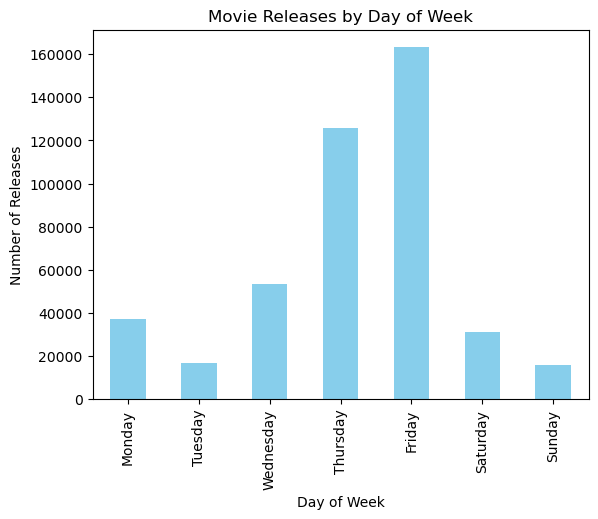

In [52]:
# Plot releases by day of week 
release_by_day = (
    release.groupby("day_of_week")["title"]
    .count()
    .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

release_by_day.plot(
    kind="bar",
    title="Movie Releases by Day of Week",
    color="skyblue",
    legend=False
)
plt.xlabel("Day of Week")
plt.ylabel("Number of Releases")
plt.show()


This output does not seem "correct" since it only shows the day of the week although the data trend seems plausible based on the pivot table. it would be better to plot it as a heatmap showing both release day and release month reflecting the pivot table. 

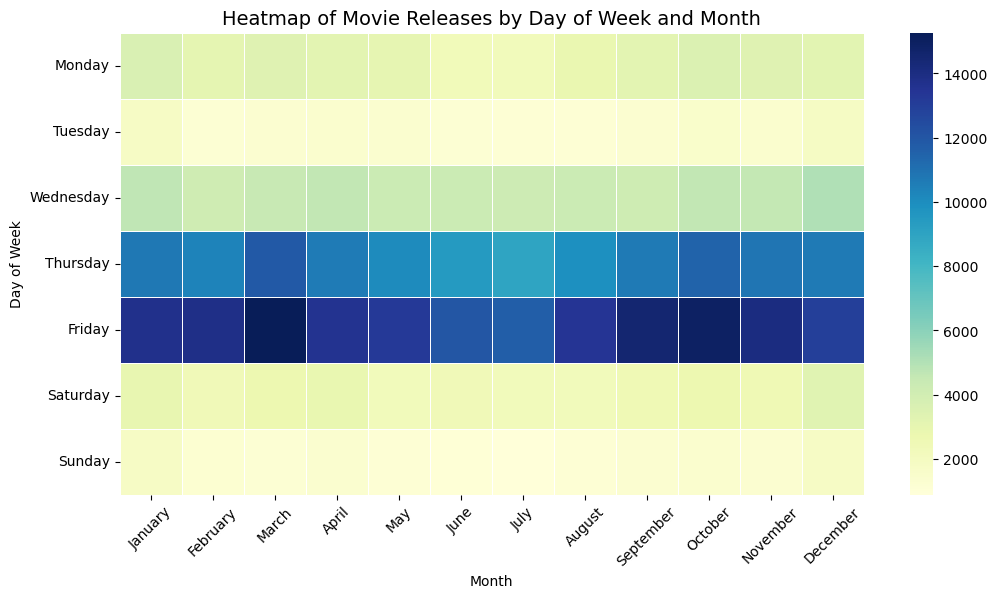

In [54]:


# Reorder the days of the week and months for logical display
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Reindex the pivot table
release_pivot = release_pivot.reindex(day_order)
release_pivot = release_pivot[month_order]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(release_pivot, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("Heatmap of Movie Releases by Day of Week and Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [56]:
#  Find all actors who appeared in any Star Wars film
star_wars_cast = cast[cast["title"].str.contains("Star Wars", case=False, na=False)]
star_wars_actors = star_wars_cast["name"].unique()

#  Find all films these actors appeared in (excluding Star Wars)
films_with_star_wars_actors = cast[
    cast["name"].isin(star_wars_actors) &
    ~cast["title"].str.contains("Star Wars", case=False, na=False)
]

#  Drop duplicates 
films_with_star_wars_actors = films_with_star_wars_actors.drop_duplicates(subset=["title", "name"])

#  Display first few results
films_with_star_wars_actors.head(20)


,title,year,name,type,character,n
3900,Addams Family Values,1993,Ian Abercrombie,actor,Driver,41.0
3901,Blasphemy the Movie,2001,Ian Abercrombie,actor,Zeus,NaN
3902,Chromiumblue.com,2003,Ian Abercrombie,actor,Sir George,NaN
3903,Clean Slate,1994,Ian Abercrombie,actor,Leader,24.0
3904,Firewalker,1986,Ian Abercrombie,actor,Boggs,7.0
3905,Garfield: A Tail of Two Kitties,2006,Ian Abercrombie,actor,Smithee,5.0
3906,Getting Even,1981,Ian Abercrombie,actor,Mr. Kenwood,NaN
3907,Grief,1993,Ian Abercrombie,actor,Stanley,22.0
3908,Hard Four,2007,Ian Abercrombie,actor,Jack Ermine,8.0
3909,Inland Empire,2006,Ian Abercrombie,actor,Henry the Butler,8.0


In [58]:
films_with_star_wars_actors.tail(20)

,title,year,name,type,character,n
3382311,Reflections,1984,Harriet Walter,actress,Ottilie Garinger,4.0
3382312,Sense and Sensibility,1995,Harriet Walter,actress,Fanny Dashwood,3.0
3382314,The Domino Effect,2012,Harriet Walter,actress,Ann,NaN
3382315,The Good Father,1985,Harriet Walter,actress,Emmy Hooper,3.0
3382316,The Governess,1998,Harriet Walter,actress,Mrs. Cavendish,5.0
3382317,The Hour of the Pig,1993,Harriet Walter,actress,Jeannine Martin,7.0
3382318,The Leading Man,1996,Harriet Walter,actress,Liz Flett,9.0
3382319,The Sense of an Ending,2017,Harriet Walter,actress,Margaret Webster,3.0
3382320,The Wedding Video,2012,Harriet Walter,actress,Alex,7.0
3382321,The Young Victoria,2009,Harriet Walter,actress,Queen Adelaide,9.0


In [66]:

# unique film titles
unique_movies_list = films_with_star_wars_actors["title"].drop_duplicates().tolist()

# how many unique titles there are
print(f"Total unique films: {len(unique_movies_list)}")

# Print all
for movie in sorted(unique_movies_list):
    print(movie)



Total unique films: 4550
$9.99
'71
'77
'Breaker' Morant
001LithiumX
1 - Nenokkadine
10 Grams
10 Years
100 Streets
101 Dalmatians
10Terrorists
12 Years a Slave
127 Hours
13 Days
13 Going on 30
13 Moons
16 Years of Alcohol
1871
1941
1st Born
2001: A Space Odyssey
2025
24 Hour Party People
28 Days
30 Nights
300
30:e november
33 Postcards
360
3: Alif, Lam, Mim
40 Pounds of Trouble
42
448 BC: Olympiad of Ancient Hellas
47 Ronin
4D Special Agents
51 Degrees North
55 Steps
6 Days
6 Ways to Die
6,000 Miles from Hollywood
633 Squadron
7 mujeres, 1 homosexual y Carlos
8th Wonderland
9
9 Dead Gay Guys
9/11: The Twin Towers
90 Minutes in Heaven
99 Homes
A Beautiful Life
A Boy Called Hate
A Bridge Too Far
A Bug's Life
A Challenge for Robin Hood
A Chump at Oxford
A Clockwork Orange
A Countess from Hong Kong
A Dangerous Age
A Dangerous Method
A Dangerous Summer
A Different Kind of Love
A Dog Year
A Doll's House
A Dry White Season
A Family Thing
A Fantastic Fear of Everything
A Far Off Place
A Fare to